In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./file/3_23/rr.csv", sep=",")
df = df.drop(['Unnamed: 15'], axis=1)  
df

,time,dcName,requestNum,finishedRequestNum,dcUsage,dcConsume,dcPrice,reSupply,reUsage,reDcUsage,reBaUsage,rePrice,baSupply,baPrice,cost
0,0,DC_CR,103103,103103,0.802,41516.549,0.000,52229.113,1.0,0.795,0.206,8446.215,10712.565,0.000,8446.215
1,0,DC_OS,103097,103097,0.600,44310.004,0.547,40374.949,1.0,1.000,0.000,1614.998,0.000,0.000,1615.545
2,0,DC_MB,103097,103097,0.754,55480.688,5.281,17457.602,1.0,1.000,0.000,7624.391,0.000,0.000,7629.672
3,0,DC_SH,103094,103094,0.702,46750.125,2.579,28187.996,1.0,1.000,0.000,27152.276,0.000,0.000,27154.855
4,0,DC_LA,103094,103094,0.657,41870.317,4.461,9757.413,1.0,1.000,0.000,8781.672,0.000,0.000,8786.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,604800,DC_CR,102104,128640,1.000,45900.000,0.000,52269.838,1.0,0.879,0.122,3867.296,6369.839,0.000,3867.296
5041,604800,DC_OS,102100,102100,0.595,44258.483,0.196,42851.453,1.0,1.000,0.000,1714.059,0.000,0.000,1714.254
5042,604800,DC_MB,102096,102096,0.747,55293.000,0.000,30299.449,1.0,1.000,0.000,4095.529,-24993.551,0.695,4096.223
5043,604800,DC_SH,102094,102094,0.696,46562.625,3.282,22938.712,1.0,1.000,0.000,17923.940,0.000,0.000,17927.222


In [3]:
df_CR = df.loc[df['dcName'] == 'DC_CR'].reset_index()
df_OS = df.loc[df['dcName'] == 'DC_OS'].reset_index()
df_SH = df.loc[df['dcName'] == 'DC_SH'].reset_index()
df_MB = df.loc[df['dcName'] == 'DC_MB'].reset_index()
df_LA = df.loc[df['dcName'] == 'DC_LA'].reset_index()

能耗

In [17]:
df_DcConsume = pd.DataFrame({'CR':df_CR['dcConsume'], 'MB':df_MB['dcConsume'], 'OS':df_OS['dcConsume'], 'SH':df_SH['dcConsume'], 'LA':df_LA['dcConsume']})

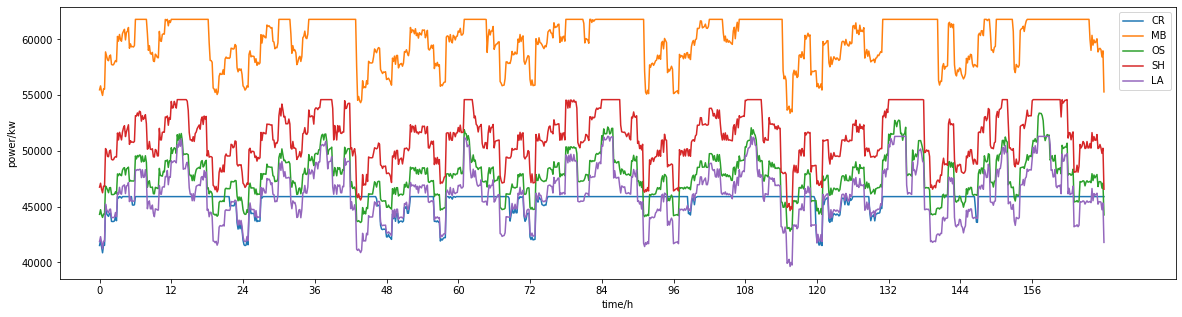

In [18]:
df_DcConsume.plot(figsize= (20, 5))
plt.xlim(-40, 1080)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("power/kw")
plt.legend(loc = 1)
plt.show()

In [15]:
df_RequestNum = pd.DataFrame({'CR':df_CR['requestNum'], 'OS':df_OS['requestNum'], 'MB':df_MB['requestNum'], 'SH':df_SH['requestNum'], 'LA':df_LA['requestNum']})

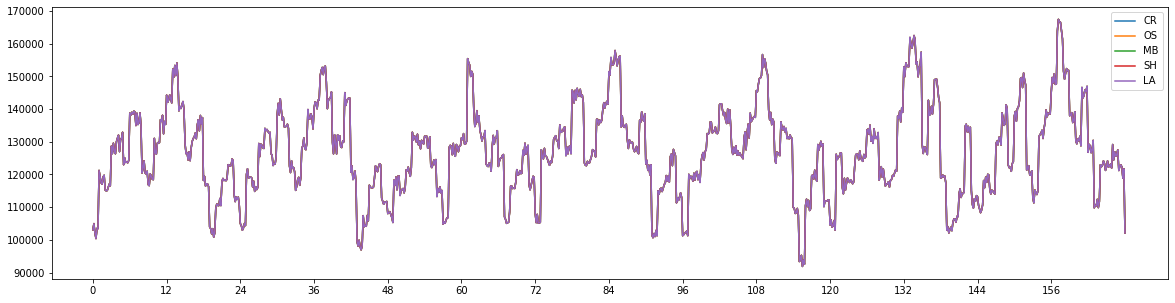

In [16]:
df_RequestNum.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [13]:
df_FinishedRequestNum = pd.DataFrame({'CR':df_CR['finishedRequestNum'], 'OS':df_OS['finishedRequestNum'], 'MB':df_MB['finishedRequestNum'], 'SH':df_SH['finishedRequestNum'], 'LA':df_LA['finishedRequestNum']})

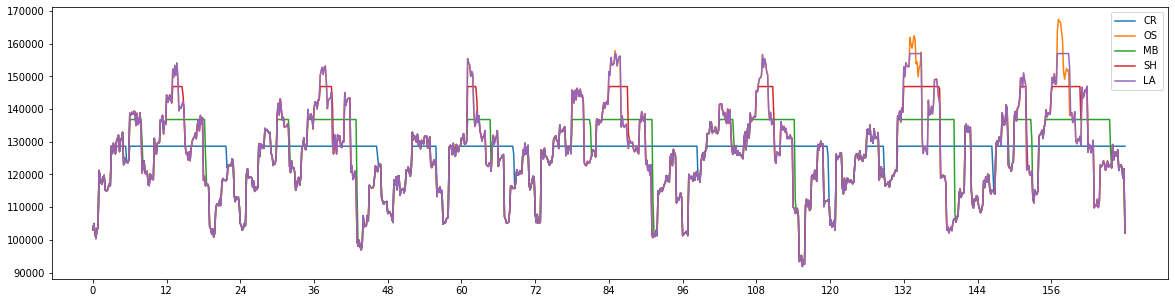

In [14]:
df_FinishedRequestNum.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [16]:
df_BaSupply = pd.DataFrame({'CR':df_CR['baSupply'], 'OS':df_OS['baSupply'], 'MB':df_MB['baSupply'], 'SH':df_SH['baSupply'], 'LA':df_LA['baSupply']})

In [17]:
#for i in [216]
df_BaSupply['LA'][216:288].sum()

-122124.32899999998

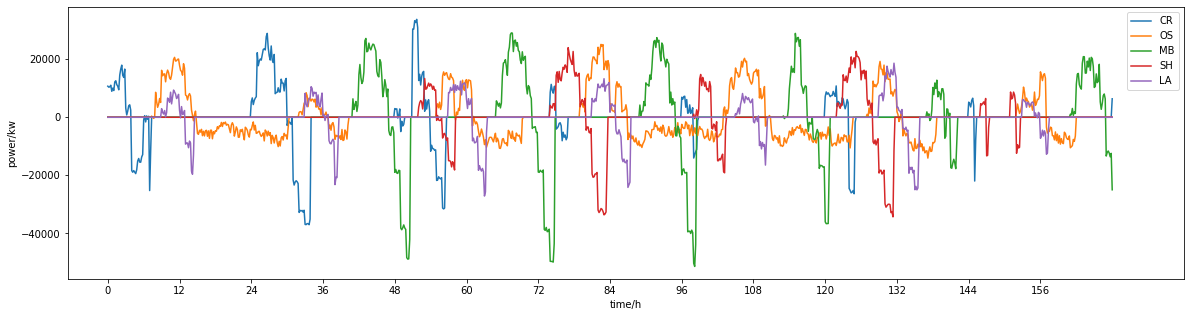

In [18]:
df_BaSupply.plot(figsize= (20, 5))
plt.xlim(-40, 1080)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("power/kw")
plt.legend(loc = 1)
plt.show()

In [4]:
df_DcPrice = pd.DataFrame({'CR':df_CR['dcPrice'], 'OS':df_OS['dcPrice'], 'MB':df_MB['dcPrice'], 'SH':df_SH['dcPrice'], 'LA':df_LA['dcPrice']})

In [5]:
df_DcPrice = df_DcPrice * 2

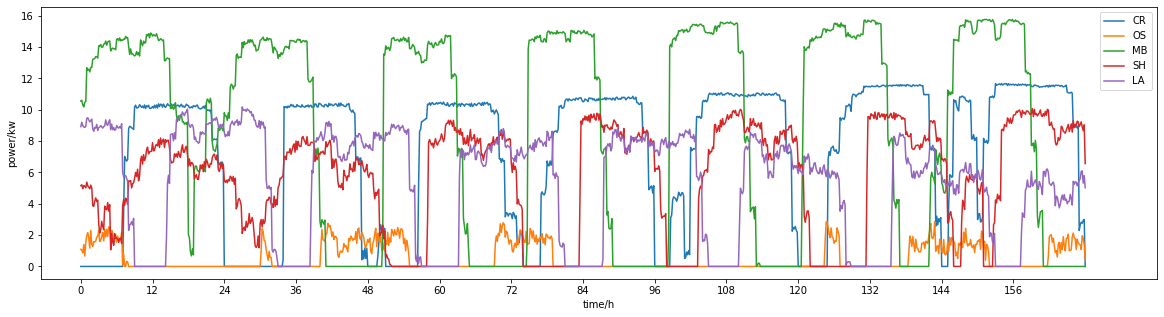

In [21]:
df_DcPrice.plot(figsize= (20, 5))
plt.xlim(-40, 1080)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("power/kw")
plt.legend(loc = 1)
plt.show()

In [26]:
df_RePrice = pd.DataFrame({'CR':df_CR['rePrice'], 'OS':df_OS['rePrice'], 'MB':df_MB['rePrice'], 'SH':df_SH['rePrice'], 'LA':df_LA['rePrice']})

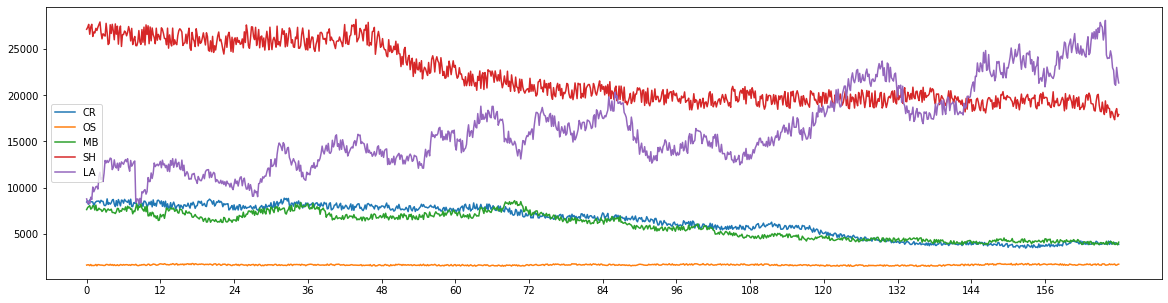

In [7]:
df_RePrice.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [24]:
df_Cost = pd.DataFrame({'CR':df_CR['cost'], 'OS':df_OS['cost'], 'MB':df_MB['cost'], 'SH':df_SH['cost'], 'LA':df_LA['cost']})

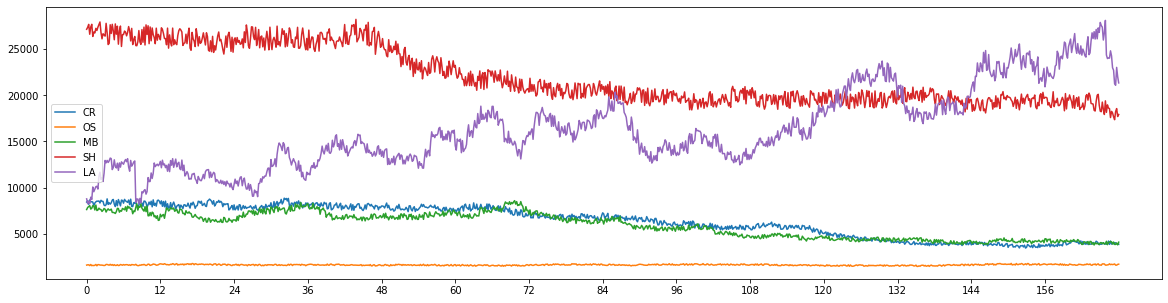

In [25]:
df_Cost.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [26]:
df_ReUsage = pd.DataFrame({'CR':df_CR['reUsage'], 'OS':df_OS['reUsage'], 'MB':df_MB['reUsage'], 'SH':df_SH['reUsage'], 'LA':df_LA['reUsage']})

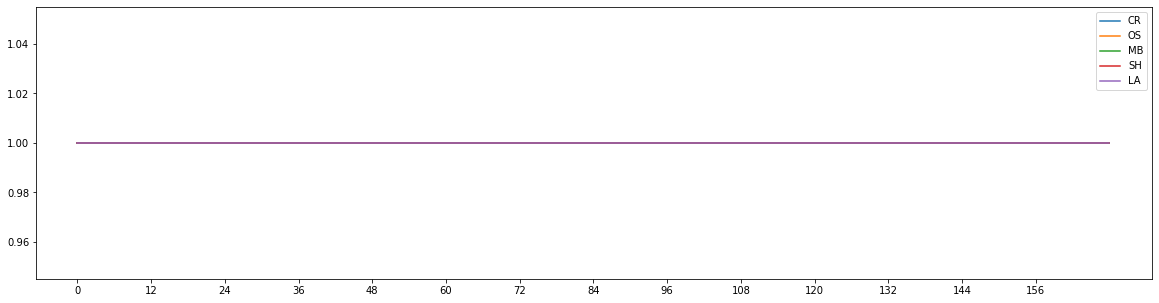

In [27]:
df_ReUsage.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

<AxesSubplot:>

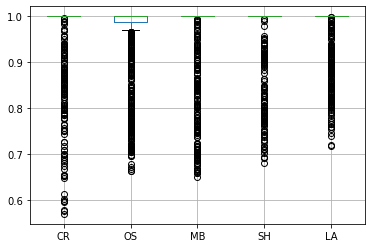

In [8]:
df_ReDcUsage = pd.DataFrame({'CR':df_CR['reDcUsage'], 'OS':df_OS['reDcUsage'], 'MB':df_MB['reDcUsage'], 'SH':df_SH['reDcUsage'], 'LA':df_LA['reDcUsage']})
df_ReDcUsage.boxplot()

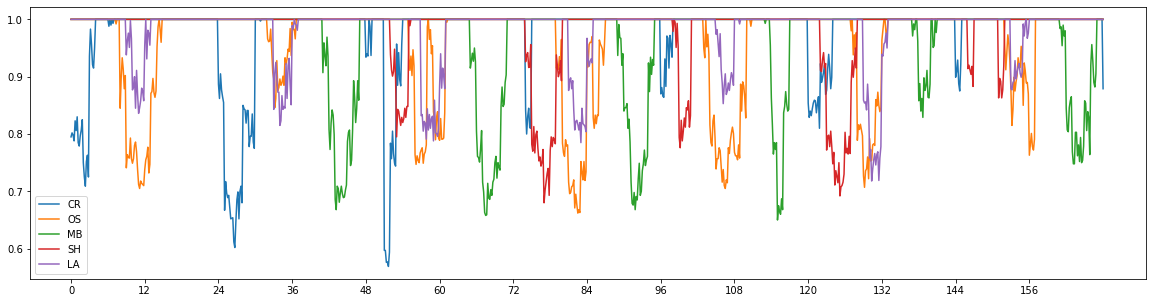

In [9]:
df_ReDcUsage.plot(figsize= (20, 5))
plt.xlim(-40, 1050)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.show()

In [27]:
df_RePrice

,CR,OS,MB,SH,LA
0,8446.215,1614.998,7624.391,27152.276,8781.672
1,8580.566,1641.310,7850.049,27363.850,8259.134
2,8202.995,1643.932,7953.607,27681.385,8510.697
3,8665.567,1559.155,8049.278,26612.735,8270.547
4,8452.234,1677.930,7674.252,27396.593,8960.169
...,...,...,...,...,...
1004,4027.727,1735.420,3854.269,17357.203,21255.724
1005,4025.957,1606.199,3852.137,18241.433,21087.819
1006,3921.500,1606.673,4006.208,18561.213,23024.424
1007,3881.610,1687.374,3806.346,17702.181,22013.556


In [29]:
df_RePrice

,CR,OS,MB,SH,LA
0,6714.740925,1614.998,7624.391,27152.276,8781.672
1,6881.613932,1641.310,7850.049,27363.850,8259.134
2,6545.990010,1643.932,7953.607,27681.385,8510.697
3,6828.466796,1559.155,8049.278,26612.735,8270.547
4,6956.188582,1677.930,7674.252,27396.593,8960.169
...,...,...,...,...,...
1004,4027.727000,1735.420,3854.269,17357.203,21255.724
1005,4025.957000,1606.199,3852.137,18241.433,21087.819
1006,3921.500000,1606.673,4006.208,18561.213,23024.424
1007,3881.610000,1687.374,3806.346,17702.181,22013.556


In [12]:
df_ReDcUsage

,CR,OS,MB,SH,LA
0,0.795,1.0,1.0,1.0,1.0
1,0.802,1.0,1.0,1.0,1.0
2,0.798,1.0,1.0,1.0,1.0
3,0.788,1.0,1.0,1.0,1.0
4,0.823,1.0,1.0,1.0,1.0
...,...,...,...,...,...
1004,1.000,1.0,1.0,1.0,1.0
1005,1.000,1.0,1.0,1.0,1.0
1006,1.000,1.0,1.0,1.0,1.0
1007,1.000,1.0,1.0,1.0,1.0


In [28]:
names = ['CR', 'OS', 'MB', 'SH', 'LA']
for name in names:
    for i in range(len(df_RePrice[name])):
        df_RePrice[name][i] = df_RePrice[name][i] * df_ReDcUsage[name][i]

In [33]:
df_RePrice = df_RePrice / 100

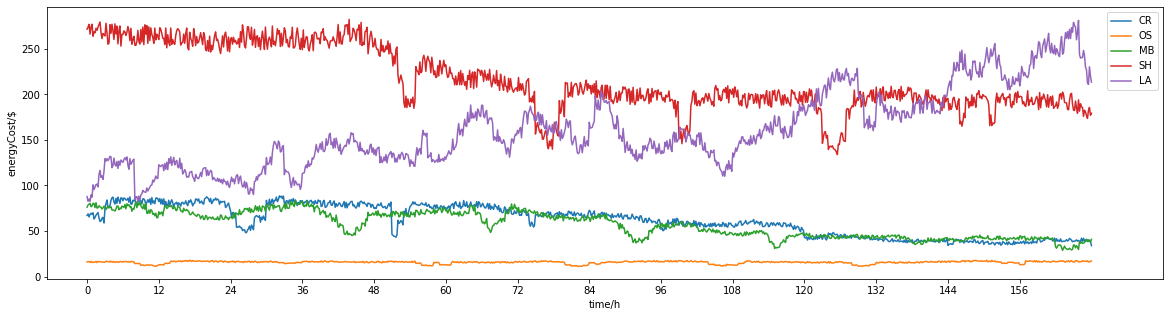

In [35]:
df_RePrice.plot(figsize= (20, 5))
plt.xlim(-40, 1080)
plt.xticks(np.arange(0, 1008, 72), np.arange(0, 168, 12))
plt.xlabel("time/h")
plt.ylabel("energyCost/$")
plt.legend(loc = 1)
plt.show()